<a href="https://colab.research.google.com/github/pravallikai/Evolution-of-musical-trends-using-py/blob/main/notebooks/7_regression_trend_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Path to your cleaned dataset
CLEANED_PATH = "/content/spotify_audio_features_1960_2019_clean.csv"

# Load the dataset
df = pd.read_csv(CLEANED_PATH)
print("Data loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()


Data loaded successfully!
Shape of dataset: (41106, 11)


,year,track,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,1960,Jealous Kind Of Fella,Garland Green,0.417,0.620,-7.727,0.0403,0.490,0.000000,0.845,185.655
1,1960,Initials B.B.,Serge Gainsbourg,0.498,0.505,-12.475,0.0337,0.018,0.107000,0.797,101.801
2,1960,Melody Twist,Lord Melody,0.657,0.649,-13.392,0.0380,0.846,0.000004,0.908,115.940
3,1960,Mi Bomba Sonó,Celia Cruz,0.590,0.545,-12.058,0.1040,0.706,0.024600,0.967,105.592
4,1960,Uravu Solla,P. Susheela,0.515,0.765,-3.515,0.1240,0.857,0.000872,0.906,114.617


In [2]:
# Check columns and types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check basic statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              41106 non-null  int64  
 1   track             41106 non-null  object 
 2   artist            41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   loudness          41106 non-null  float64
 6   speechiness       41106 non-null  float64
 7   acousticness      41106 non-null  float64
 8   instrumentalness  41106 non-null  float64
 9   valence           41106 non-null  float64
 10  tempo             41106 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 3.4+ MB
None
year                0
track               0
artist              0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
valence        

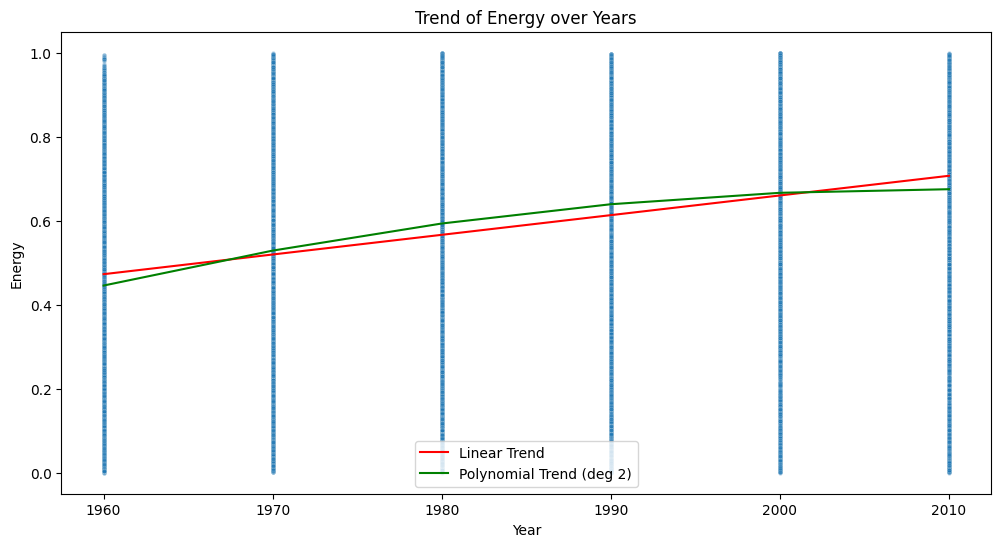

Linear R²: 0.10519669839136259
Polynomial R²: 0.1137723470925962


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Example: Trend of 'energy' over the years
X = df[['year']]  # Independent variable
y = df['energy']  # Dependent variable

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Polynomial Regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

# Plotting
plt.figure(figsize=(12,6))
sns.scatterplot(x='year', y='energy', data=df, alpha=0.3, s=10)
plt.plot(df['year'], y_pred_lin, color='red', label='Linear Trend')
plt.plot(df['year'], y_pred_poly, color='green', label='Polynomial Trend (deg 2)')
plt.xlabel('Year')
plt.ylabel('Energy')
plt.title('Trend of Energy over Years')
plt.legend()
plt.show()

# R² scores
print("Linear R²:", r2_score(y, y_pred_lin))
print("Polynomial R²:", r2_score(y, y_pred_poly))


In [5]:
import pandas as pd

CLEANED_PATH = "/content/spotify_audio_features_1960_2019_clean.csv"

# Load dataset
df = pd.read_csv(CLEANED_PATH)
print("Dataset loaded:", df.shape)
df.head()


Dataset loaded: (41106, 11)


,year,track,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,1960,Jealous Kind Of Fella,Garland Green,0.417,0.620,-7.727,0.0403,0.490,0.000000,0.845,185.655
1,1960,Initials B.B.,Serge Gainsbourg,0.498,0.505,-12.475,0.0337,0.018,0.107000,0.797,101.801
2,1960,Melody Twist,Lord Melody,0.657,0.649,-13.392,0.0380,0.846,0.000004,0.908,115.940
3,1960,Mi Bomba Sonó,Celia Cruz,0.590,0.545,-12.058,0.1040,0.706,0.024600,0.967,105.592
4,1960,Uravu Solla,P. Susheela,0.515,0.765,-3.515,0.1240,0.857,0.000872,0.906,114.617


In [6]:
# Select numeric columns for regression
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print("Numeric columns:", numeric_cols)

# Key features we want to analyze
features = ['energy', 'danceability', 'tempo', 'valence', 'acousticness', 'instrumentalness']


Numeric columns: ['year', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']


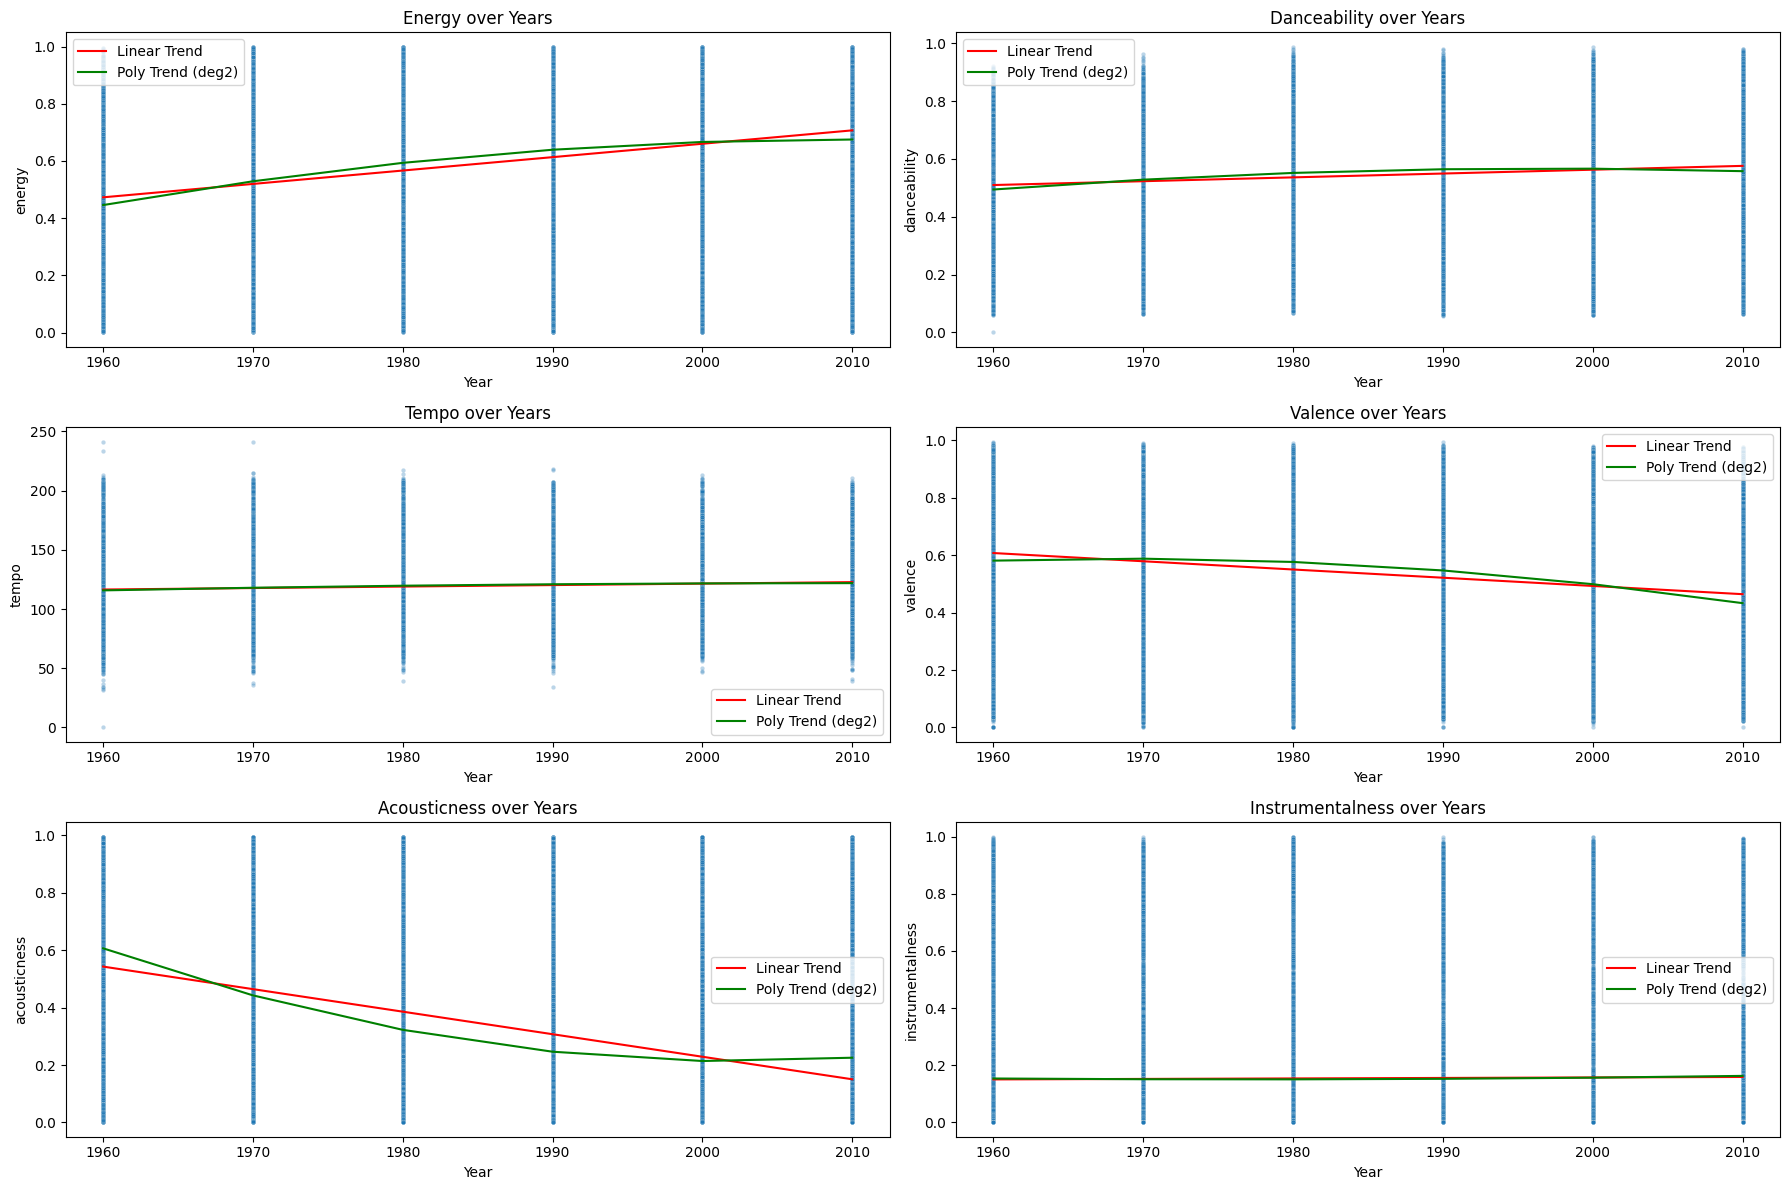

,Linear Slope,Linear R2,Polynomial R2
energy,0.004684,0.105197,0.113772
danceability,0.001325,0.016985,0.022643
tempo,0.125017,0.005647,0.006110
valence,-0.002867,0.035190,0.042497
acousticness,-0.007854,0.164319,0.190663
instrumentalness,0.000171,0.000097,0.000181


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Prepare the year variable
X = df[['year']]

# Dictionary to store R² scores and slopes
trend_summary = {}

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    y = df[feature]

    # Linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred_lin = lin_reg.predict(X)

    # Polynomial regression (degree 2)
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)
    y_pred_poly = poly_reg.predict(X_poly)

    # Save trend info
    trend_summary[feature] = {
        'Linear Slope': lin_reg.coef_[0],
        'Linear R2': r2_score(y, y_pred_lin),
        'Polynomial R2': r2_score(y, y_pred_poly)
    }

    # Plot trends
    plt.subplot(3, 2, i)
    sns.scatterplot(x='year', y=feature, data=df, alpha=0.3, s=10)
    plt.plot(df['year'], y_pred_lin, color='red', label='Linear Trend')
    plt.plot(df['year'], y_pred_poly, color='green', label='Poly Trend (deg2)')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(f'{feature.capitalize()} over Years')
    plt.legend()

plt.tight_layout()
plt.show()

# Summary table
trend_summary_df = pd.DataFrame(trend_summary).T
trend_summary_df
